###### $$ \text{AMOROSETTI Gabriel et DARDIER Théo } $$
###### $$ \text{ L2 PS Physique, mai 2021} $$

# $$ \text{TRAQUE DE FONDAMENTALES} $$

Le domaine de l'analyse de Fourier est une des pierres angulaires de la physique moderne. Utile dans nombre de spécialités, elle permet notamment, via la transformée de Fourier discrète, de décomposer des signaux temporels périodiques en une somme de signaux périodiques de fréquences bien déterminées. Généralement, on observe une fréquence fondamentale dans le signal (la plus basse à être signifiante) ainsi que des multiples entiers de cette fréquence, on les appelle des harmoniques.

Nous recevons constamment des signaux audios, venant d'un intrument de musique, d'une sirène d'ambulance, de notre voix, du chant d'un oiseau. L'intérêt du projet, que nous allons vous présenter dans les lignes suivantes, est d'utiliser la transformée de Fourier discrète dans le but de développer des méthodes d'analyse de ces signaux audios, nous permettant alors de suivre la fréquence fondamentale du son au cours du temps. Pour commencer, nous allons introduire des méthodes simples d'utilisation de transformée de Fourier discrète. Dans une deuxième partie, nous irons plus loin en poussant ces méthodes, nous permettant alors d'analyser complètement des signaux audios.

# I. Transformée de Fourier discrète (DFT)

Pour commencer, voici quelques modules $\textit{python}$ absolument nécessaires à la poursuite de ce projet :

- le module $\textit{librosa}$ nous permet d'extraire les données d'un fichier audio en un tableau $\textit{numpy}$  
- $\textit{matplotlib}$ nous permet de tracer et visualiser des graphiques 
- $\textit{numpy}$ nous est utile pour manipuler des tableaux, matrices et fonctions mathématiques 
- $\textit{IPython}$ nous servira pour jouer un fichier audio
- $\textit{cmath}$ nous permettra plus tard de calculer la phase d'un nombre complexe

On prendra également soin de téléverser les fichiers audios nécessaires dans la page d'accueil Jupyter.

In [1]:
# Importation des modules nécessaires au fonctionnement du programme

import librosa.core
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import cmath

    
On considère le signal audio à étudier comme une fonction $f: \mathbb{R} \rightarrow \mathbb{R}$ que l'on va échantillonner dans un intervalle compact $[0,T]$ aux points $\left(t_{k}\right)_{0 \leq k \leq N}$ répartis de manière uniforme. On a ainsi le signal audio échantillonné $\left(u_{k}\right)_{0 \leq k<N}$ tel que : $$
\forall k \in\{0, \ldots, N-1\}: u_{k}=f\left(t_{k}\right) \quad t_{k}=k \frac{T}{N}
$$  
où $\frac{T}{N}$ est la fréquence d'échantillonnage.

Fréquence d'échantillonnage : 4410 Hz
Durée du signal:  1.0 secondes


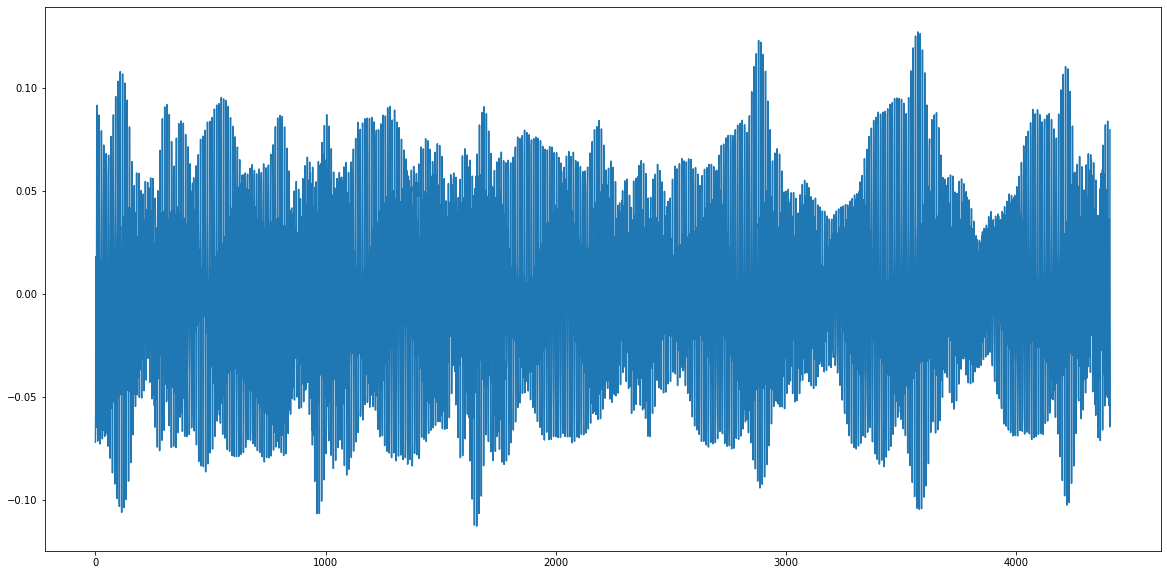

In [2]:
# Ouverture du fichier audio, échantillonné à une fréquence d'échantillonnage de 4410 Hz
u, sr = librosa.core.load("violin1.wav", 4410) 

# Affichage de la fréquence d'échantillonnage et de la durée du signal
print("Fréquence d'échantillonnage :",sr, "Hz")

# Extraction de la deuxième seconde du signal (par exemple)
v = u[1 * sr: 2 * sr]

# Affichage de la durée du signal
print("Durée du signal: ",len(v)/sr ,"secondes")

# Affichage du signal audio que l'on va étudier
plt.figure(figsize = (20, 10))
plt.plot(v)
plt.show()

# Écoute du signal audio
ipd.Audio(v, rate=sr)

La transformée de Fourier discrète (Discrete Fourier Transform, $\textit{DFT}$) est un équivalent discret de la transformée de Fourier. Si $u$ est le vecteur représentant le signal audio, la DFT est le vecteur des coordonnées de $u$ dans la base de Fourier.  

On a donc $û$, la DFT de $u$, définie par :

$$\forall k \in\{0, \ldots, N-1\}: \hat{u}_{k}=\frac{u \cdot f_{k}}{\left\|f_{k}\right\|^{2}}=\sum_{n=0}^{N-1} u_{n} \omega^{-k n}=\sum_{n=0}^{N-1} u_{n} \exp \left(-\frac{2 i k n \pi}{N}\right)$$  

avec la base de Fourier $\left(f_{k}\right)_{0 \leq k<N}$ définie par : 

$$
f_{k}=\frac{1}{N}\left(\begin{array}{c}
\exp \left(\frac{2 i \times 0 \times k \pi}{N}\right) \\
\exp \left(\frac{2 i \times 1 \times k \pi}{N}\right) \\
\exp \left(\frac{2 i \times 2 \times k \pi}{N}\right) \\
\vdots \\
\exp \left(\frac{2 i \times(N-1) \times k \pi}{N}\right)
\end{array}\right)=\frac{1}{N}\left(\begin{array}{c}
\omega^{0 k} \\
\omega^{1 k} \\
\omega^{2 k} \\
\vdots \\
\omega^{(N-1) k}
\end{array}\right) \in \mathbb{C}^{N} \quad \omega=e^{2 i \pi / N} \in \mathbb{C}
$$  

Le calcul de $û$ à partir de cette définition serait beaucoup trop long à réaliser (car N peut être très grand). Nous allons alors utiliser la transformation de Fourier rapide (Fast Fourier Transform, $\textit{FFT}$), un algorithme qui permet de calculer la DFT.

Sans approfondir les calculs, on peut montrer que si $N$ est une puissance de $2$, $û$ peut s'écrire de la forme suivante :

$$
\begin{aligned}
\hat{u}_{k} &=\sum_{m=0}^{N / 2-1} u_{2 m} \exp \left(-\frac{2 i k m \pi}{N / 2}\right)+\exp \left(-\frac{2 i k \pi}{N}\right) \sum_{m=0}^{N / 2-1} u_{2 m+1} \exp \left(-\frac{2 i k m \pi}{N / 2}\right) \\
&=\hat{v}_{k}+\omega^{-k} \hat{w}_{k}
\end{aligned}
$$  

avec $v=\left(u_{0}, u_{2}, \ldots, u_{N-2}\right) \in \mathbb{C}^{N / 2}$ le vecteur fait à partir des composantes paires de $u$, et $w=\left(u_{1}, u_{3}, \ldots, u_{N-1}\right) \in \mathbb{C}^{N / 2}$ le vecteur fait à partir des composantes impaires de $u$.

Voici le programme type nous permettant de calculer la DFT d'un signal :

In [3]:
# Calcul de la DFT de v
dft = np.fft.fft(v)

# Calcul des fréquences physiques (en Hz) qui correspondent aux coefficients de la DFT 
frequencies = np.fft.fftfreq(len(dft), 1 / sr)

# Réordonnement par mode croissant des données en permutant les deux moitiés d’un tableau de chaque côté de la fréquence de coupure
x = np.fft.fftshift(frequencies)
y = np.fft.fftshift(dft)

Pour représenter graphiquement la DFT, on utilisera tout d'abord le module de $û$ (car $\hat{u} \in \mathbb{C}^{N}$). On représentera la DFT à l'échelle logarithmique, c'est à dire en représentant $log(1+|û_{k}|)$ en fonction des fréquences (dans notre code, $x$).

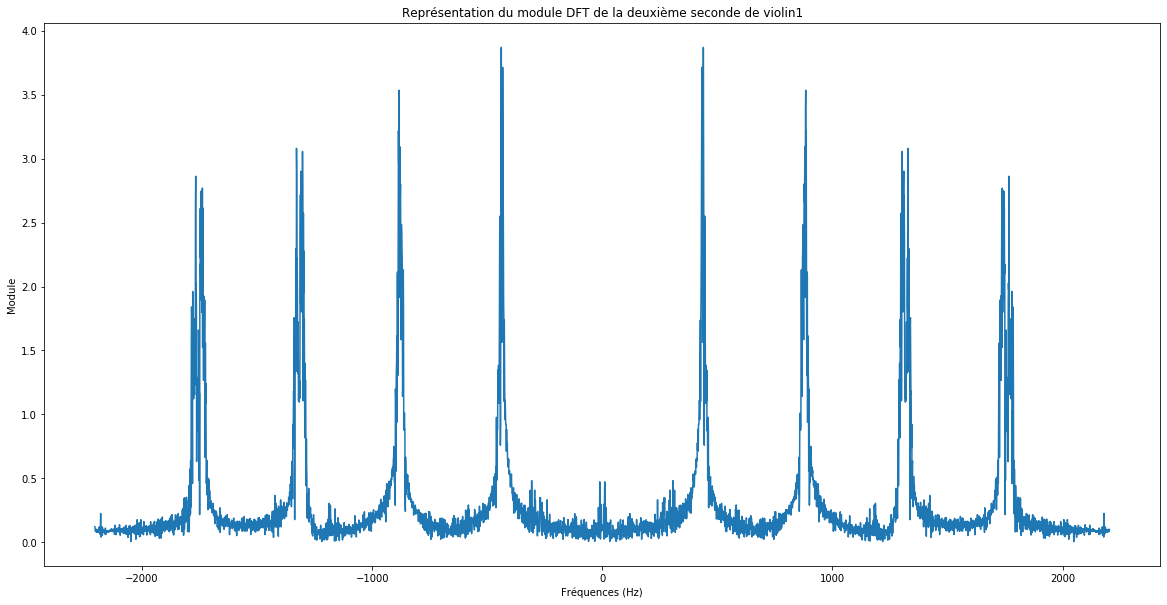

In [4]:
# Affichage du spectre en amplitude (module de la DFT)
plt.figure(figsize = (20, 10))
plt.plot(x, np.log(1 + np.abs(y)))
plt.title("Représentation du module DFT de la deuxième seconde de violin1")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Module")
plt.show()

## I.1. Détection approximative de la fondamentale

Comme l'énonce le titre de cette partie, nous allons exposer maintenant des premières méthodes nous permettant de localiser plus ou moins précisément la fréquence fondamentale de notre signal audio.

### I.1.a Détection simple     

Nous faisons le choix de travailler uniquement sur la partie positive du spectre, c'est à dire la moité "à droite". En effet lorsque le signal est réel, on a $\hat{u}_k=\overline{\hat{u}_{N-k}}$ ce qui veut dire que son module est symétrique par rapport au centre du spectre. Les deux parties symétriques du spectre nous fournissent donc les mêmes informations sur le signal.

Nous nous assurons ainsi d'avoir un algorithme déterministe car en utilisant le spectre entier, le maximum de la FFT pourrait être détecté, suivant la machine utilisée, soit dans la partie positive du spectre, soit dans sa partie négative.

In [5]:
#Conservation de la partie positive du spectre
x=x[len(x)//2:]
y=y[len(y)//2:]

Une première méthode pour déterminer la fréquence fondamentale du signal est de déterminer $k_{\max }=\underset{0<k<N / 2}{\arg \max }\left|\hat{u}_{k}\right|$, où $k_{\max }$ est donc l'indice de l'élément le plus grand dans le tableau de valeurs associé à $\left|\hat{u}_{k}\right|$. 

On détermine ensuite l'élément correspondant à cet indice dans la liste des fréquences pour obtenir la fréquence fondamentale.

In [6]:
# Détection simple de la fréquence fondamentale du signal
print("Détection simple de la fréquence fondamentale :")
maxi=np.argmax(np.abs(y))
print("Indice du maximum de la DFT =",maxi)
print("Fréquence fondamentale associée=",x[maxi],'Hz')

Détection simple de la fréquence fondamentale :
Indice du maximum de la DFT = 439
Fréquence fondamentale associée= 439.0 Hz


### I.1.b Prise en compte du poids des harmoniques successives

Cependant, la méthode de détection simple peut détecter une autre harmonique que la fondamentale, nottament pour des instruments de musique dont la fondamentale est pratiquement absente. C'est en particulier le cas pour le hautbois :

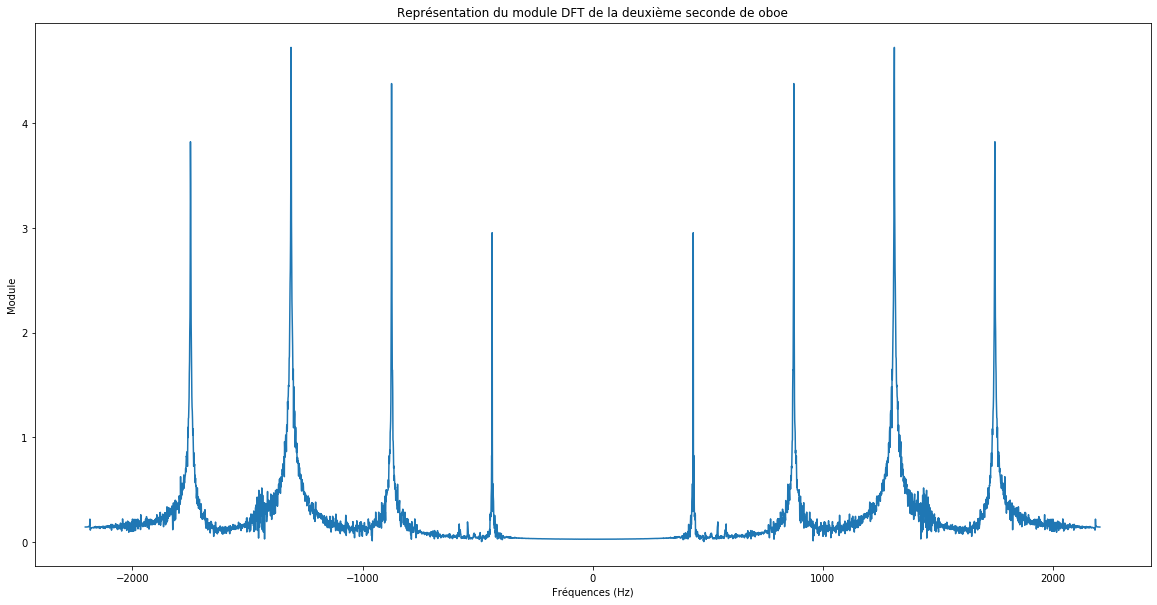

In [7]:
# Ouverture du fichier audio, échantillonné à une fréquence d'chantillonnage de 4410 Hz
u, sr = librosa.core.load("oboe.wav", 4410) 

# Extraction de la deuxième seconde du signal (par exemple)
v = u[1 * sr: 2 * sr]

# Calcul de la DFT de v
dft = np.fft.fft(v)

# Calcul des fréquences physiques (en Hz) qui correspondent aux coefficients de la DFT 
frequencies = np.fft.fftfreq(len(dft), 1 / sr)

# Réordonnement par mode croissant des données en permutant les deux moitiés d’un tableau de chaque côté de la fréquence de coupure
x = np.fft.fftshift(frequencies)
y = np.fft.fftshift(dft)

# Affichage du spectre en amplitude (module de la DFT)
plt.figure(figsize = (20, 10))
plt.plot(x, np.log(1 + np.abs(y)))
plt.title("Représentation du module DFT de la deuxième seconde de oboe")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Module")
plt.show()

#Conservation de la partie positive du spectre
x=x[len(x)//2:]
y=y[len(y)//2:]

On peut alors tenter de localiser la fréquence fondamentale "trivialement" :

In [8]:
# Détection simple de la fréquence fondamentale du signal
print("Détection simple de la fréquence fondamentale :")
maxi=np.argmax(np.abs(y))
print("Indice du maximum de la DFT =",maxi)
print("Fréquence fondamentale associée=",x[maxi],'Hz')

Détection simple de la fréquence fondamentale :
Indice du maximum de la DFT = 1311
Fréquence fondamentale associée= 1311.0 Hz


Or on voit sur notre DFT que la fréquence fondamentale est située bien en-dessous de $1311 Hz$. Pour contourner ce problème, on peut utiliser une autre méthode qui consiste à prendre en compte le poids de $J>0$ harmoniques successives, c'est-à-dire qu'on va donner plus d'importance aux fréquences les plus basses, on va en quelque sorte pénaliser les fréquences intermédiaires pour être sûrs de ne pas localiser une harmonique prépondérante. On a :

$$
\begin{aligned}
k_{\max } &=\underset{0<k<N /(2 J)}{\arg \max }\left(\sum_{j=0}^{2 J-2}(-1)^{j}\left|\hat{u}_{\lfloor k(1+j / 2)\rfloor}\right|\right) \\
&=\underset{0<k<N /(2 . J)}{\arg \max }\left(\left|\hat{u}_{k}\right|-\left|\hat{u}_{\lfloor 3 k / 2\rfloor}\right|+\left|\hat{u}_{2 k}\right|-\ldots+\left|\hat{u}_{J k}\right|\right)
\end{aligned}
$$

On peut alors coder cette formule facilement tout en laissant le choix du paramètre $J$ :

In [9]:
# Choix du paramètre J
J=2
#paramètre de calcul de la somme
summax=0
# Boucle permettant de calculer la somme pour k allant de 0 à N//2J
for k in np.linspace(0,len(x)//(2*J),len(x)//(2*J)):
    sumy=0
    for j in range(2*J-1):
        #int permet ici de prendre les parties entières des nombres impliqués
        sumy=sumy+np.abs(y)[int(k*(1+j/2))]*(-1)**j
    #condition nous permettant de trouver la fréquence maximale
    if sumy>summax:
        summax=sumy
        kmax=k
        
print("Fréquence fondamentale associée=",kmax,"Hz")

Fréquence fondamentale associée= 437.7945454545454 Hz


Le choix de la taille de la fenêtre en fréquence des pondérations ($J$) a un effet conséquent sur la fréquence fondamentale détectée. Dans notre cas on sous-échantillonne à $4410$ $\textit{Hz}$, on ne peut donc pas prendre une grande fenêtre fréquentielle face à une petite fenêtre temporelle (liée à ce sous-échantillonnage). Ainsi, dans la suite, en prenant $J\in\{1,2\}$ et en gardant cette fréquence d'échantillonnage, on n'aura aucun soucis à localiser la fondamentale. On note que si l'on veut augmenter $J$, il faudra modifier cette fréquence d'échantillonnage.

## I.2 Amélioration de la résolution fréquentielle par interpolation de l’amplitude

La DFT étant de nature discrète, les méthodes utilisées précedemment ont une résolution fréquentielle plutôt faible.
Pour améliorer la résolution fréquentielle, on peut  interpoler l'amplitude, $\left|\hat{u}\right|$, aux indices $k_{\text {max }}-1$, $k_{\text {max }}$ et $k_{\text {max}}+1$ par un polynôme de degré 2. On pourra ensuite déterminer la valeur qui correspond au maximum de ce polynôme. Pour réaliser cette interpolation, on construit notre polynôme sur la base de Lagrange : 

$$
\begin{aligned}
L_i(x)=\prod\limits_{j=0 ; j\ne i}^n \frac{x-x_j}{x_i-x_j}
\end{aligned}
$$

INTERPOLATION
437
argmax max= 437 (indiçage)
Fréquence fondamentale associée= 437.0 Hz


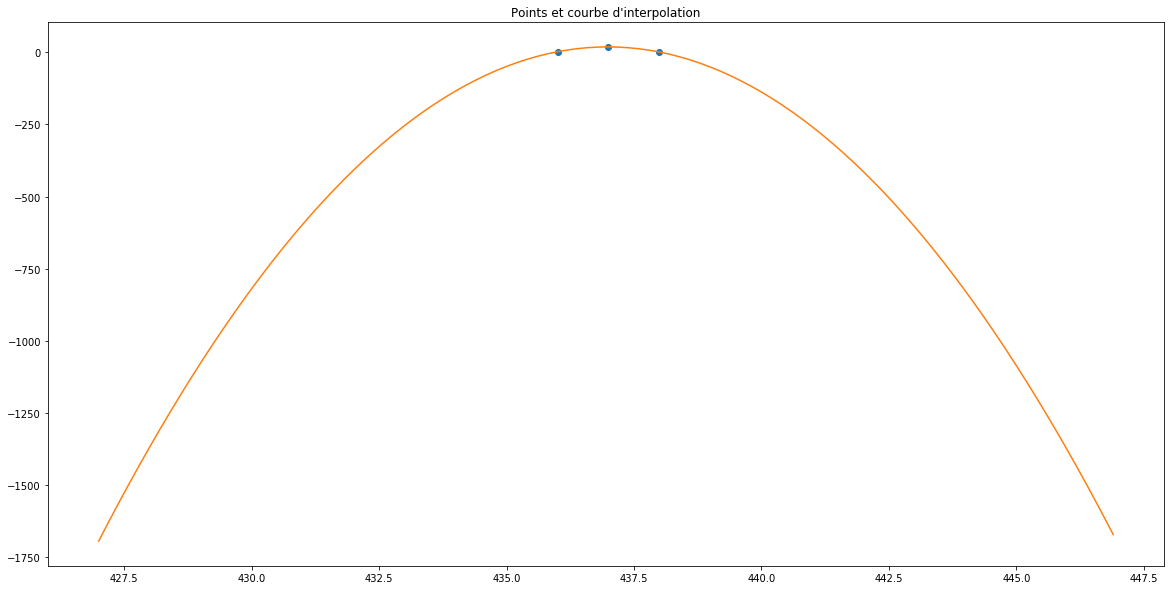

In [10]:
#Interpolation de l’amplitude
print("INTERPOLATION")

#initialisation des points à interpoler
kmax=int(kmax)
print(kmax)
X=[kmax-1,kmax,kmax+1]

#construction de la base de Lagrange associée à ces points
def Poly_base_Lagrange(i, A, x):
    p = 1
    for j in range(len(A)):
        if j != i:
            p *= (x - A[j]) / (A[i] - A[j])
    return p

#construction du polynôme d'interpolation
def Poly_interpolation(A, x):
    P = 0
    for k in range(len(A)):
        P += np.abs(y)[int(A[k])] * Poly_base_Lagrange(k, A, x)
    return P

Y=[]
for i in range(len(X)):
    Y.append(np.abs(y[int(X[i])]))

#affichage des points d'interpolation et du polynôme associé
plt.figure(figsize = (20, 10))
plt.plot(X,Y,'o')
plt.plot(np.arange(kmax-10,kmax+10,0.1),Poly_interpolation(X,np.arange(kmax-10,kmax+10,0.1)))
plt.title("Points et courbe d'interpolation")
#détermination de la fréquence fondamentale en fonction de la courbe d'interpolation
print("argmax max=",np.argmax(Poly_interpolation(X,np.arange(0,len(x),1))),"(indiçage)")
print("Fréquence fondamentale associée=", x[np.argmax(Poly_interpolation(X,np.arange(0,len(x),1)))],"Hz")

Cette méthode d'interpolation fonctionne bien mais dans notre cas, il faudra toujours veiller à ce que la fréquence fondamentale alors calculée ne sorte pas de l'intervalle $[kmax-1/2,kmax+1/2]$. Ici dans le cadre d'une DFT, on a une portion courte du signal audio, donc on s'arrange en quelque sorte pour avoir une note en théorie constante. Cette méthode ne sera donc pas la plus profitable dans le contexte seul d'une DFT mais sera peut-être encore plus utile pour une SDFT où les fenêtres alors considérées chevaucheront deux notes ce qui impliquera une détection moins précise des fréquences fondamentales.

## I.3 Amélioration de la localisation fréquentielle par fenêtrage non rectangulaire

Il est très rare que le spectre soit nul au voisinage de la fréquence fondamentale. On peut montrer qu'au voisinage de $k_0$, $\left|\hat{u}_{k}\right|$ décroît comme $\frac{1}{\left|k_{0}-k\right|}$, c'est la fuite de spectre, qui complique la détection des harmoniques. Pour améliorer la localisation fréquentielle et donc limiter la fuite de spectre, on peut réaliser un fenêtrage non rectangulaire, c'est à dire pré-multiplier le signal par une sinusoïde réelle de mode $\frac{1}{2}$ avant de réaliser la DFT.

Si $u_n$ est le signal à étudier, on considèrera désormais le nouveau signal $v_n$ tel que : $v_{n}=u_{n} \sin \left(\frac{n \pi}{N}\right)$

On applique alors cette méthode sur "oboe.wav" :

In [11]:
#Fenêtrage non rectangulaire
#création du "nouveau" signal
U=[]
for i in range(len(u)):
    U.append(u[i]*np.sin(i*np.pi*(10/sr)))

# Extraction de la deuxième seconde du signal
v = U[1 * sr: 2 * sr]

Durée du signal:  1.0 secondes


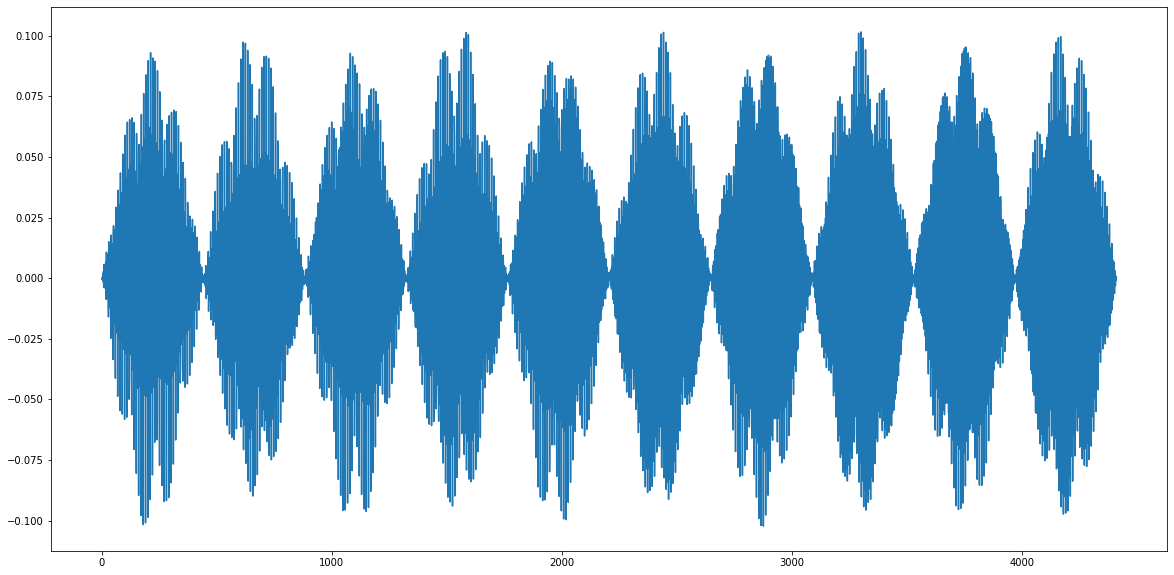

In [12]:
# Affichage de la durée du signal
print("Durée du signal: ",len(v)/sr ,"secondes")

# Affichage du signal audio que l'on va étudier
plt.figure(figsize = (20, 10))
plt.plot(v)
plt.show()

# Écoute du signal audio
ipd.Audio(v, rate=sr)

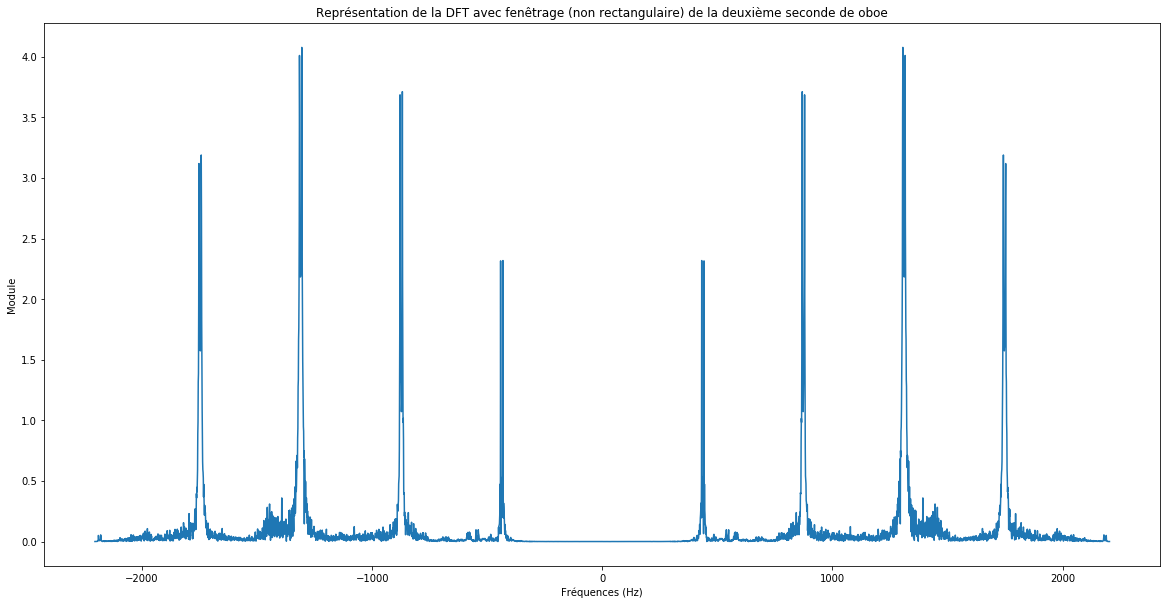

In [13]:
# Calcul de la DFT de v
dft = np.fft.fft(v)

# Calcul des fréquences physiques (en Hz) qui correspondent aux coefficients de la DFT 
frequencies = np.fft.fftfreq(len(dft), 1 / sr)

# Réordonnement par mode croissant des données en permutant les deux moitiés d’un tableau, 
# de chaque côté de la fréquence de coupure
x = np.fft.fftshift(frequencies)
y = np.fft.fftshift(dft)

# Affichage du spectre en amplitude (module de la DFT)
plt.figure(figsize = (20, 10))
plt.plot(x, np.log(1 + np.abs(y)))
plt.title("Représentation de la DFT avec fenêtrage (non rectangulaire) de la deuxième seconde de oboe")
plt.xlabel("Fréquences (Hz)")
plt.ylabel("Module")
plt.show()

On remarque déjà qu'en appliquant cette méthode de fenêtrage non rectangulaire, on a en affichant la DFT, des harmoniques beaucoup plus prononcées et ainsi on supprime en partie ce phénomène de fuite de spectre. En effet on a maintenant que au voisinage de $k_0$, $\left|\hat{u}_{k}\right|$ décroît comme $\frac{1}{\left|k_{0}-k\right|^2}$. On peut alors réitérer notre processus pour localiser la fondamentale :

In [14]:
#Conservation partie positive du spectre
x=x[len(x)//2:]
y=y[len(y)//2:]

In [15]:
# Détection simple de la fréquence fondamentale du signal
print("Détection simple de la fréquence fondamentale :")
maxi=np.argmax(np.abs(y))
print("Indice du maximum de la DFT =",maxi)
print("Fréquence fondamentale associée=",x[maxi],"Hz")

Détection simple de la fréquence fondamentale :
Indice du maximum de la DFT = 1306
Fréquence fondamentale associée= 1306.0 Hz


In [16]:
#Prise en compte du poids de l'harmonique/fondamentale
print("FONDAMENTALE AVEC POIDS")
J=2
summax=0
for k in np.linspace(0,len(x)//(2*J),len(x)//(2*J)):
    sumy=0
    for j in range(2*J-1):
        sumy=sumy+np.abs(y)[int(k*(1+j/2))]*(-1)**j
    if sumy>summax:
        summax=sumy
        kmax=k
print("Fréquence fondamentale associée=",kmax,"Hz")

FONDAMENTALE AVEC POIDS
Fréquence fondamentale associée= 434.7890909090909 Hz


INTERPOLATION
argmax max= 434 (indiçage)
Fréquence fondamentale associée= 434.0 Hz


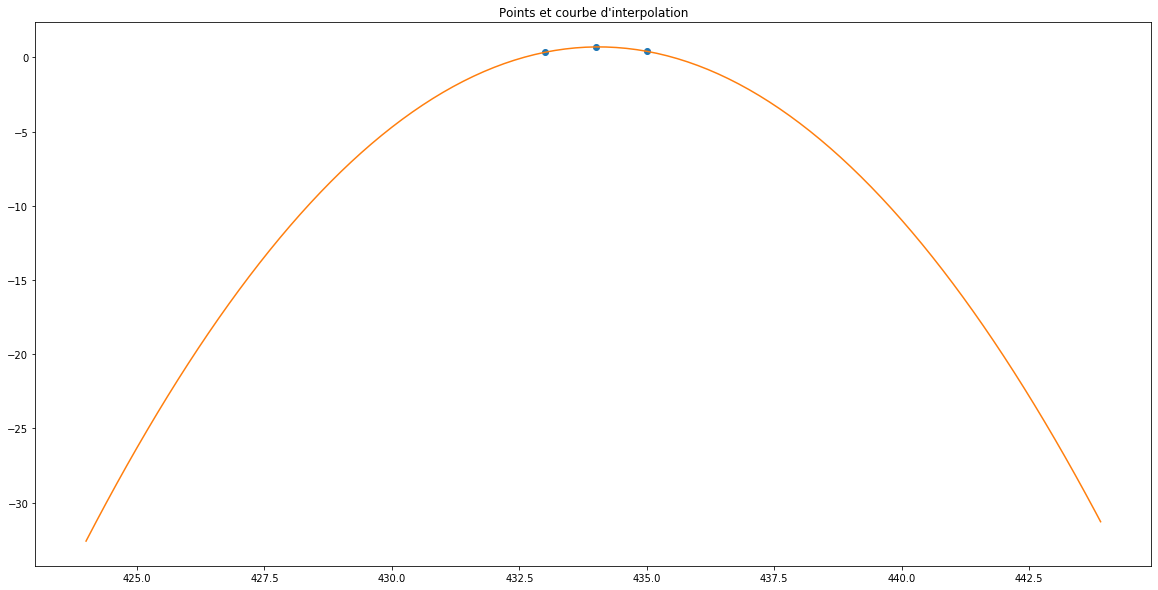

In [17]:
#Interpolation harmonique
print("INTERPOLATION")

kmax=int(kmax)
X=[kmax-1,kmax,kmax+1]
Y=[]
for i in range(len(X)):
    Y.append(np.abs(y[X[i]]))
    
#affichage des points d'interpolation et du polynôme associé
plt.figure(figsize = (20, 10))
plt.plot(X,Y,'o')
plt.plot(np.arange(kmax-10,kmax+10,0.1),Poly_interpolation(X,np.arange(kmax-10,kmax+10,0.1)))
plt.title("Points et courbe d'interpolation")

#détermination de la fréquence fondamentale à partir de la courbe d'interpolation
print("argmax max=",np.argmax(Poly_interpolation(X,np.arange(0,len(x),1))),"(indiçage)")
print("Fréquence fondamentale associée=",x[np.argmax(Poly_interpolation(X,np.arange(0,len(x),1)))],"Hz")

On voit que dans le cas de ce fichier audio (oboe), le fenêtrage non rectangulaire décale vraisemblablement la position de la fréquence fondamentale du signal. Sachant que la note jouée dans "oboe" a une fondamentale théorique de $440 \textit{Hz}$, la méthode sans fenêtrage non rectangulaire semble plus précise. En appliquant le même processus sur le signal "violin1", on trouve sans fenêtrage $f=439 \textit{Hz}$ et avec $f=444 \textit{Hz}$. Pour une fréquence fondamentale théorique de $440 \textit{Hz}$, c'est encore une fois la méthode sans fenêtrage qui l'emporte pour ces signaux, qui sont sûrement très peu bruités.

# II. Sliding Discrete Fourier Transform (SDFT)

Dans cette partie, nous allons introduire le concept de SDFT. En effet, nous venons d'exposer différentes méthodes permettant de calculer la fréquence fondamentale d'un signal audio, sur un certain intervalle de temps. Le problème étant que si l'on exécute une DFT sur un signal long, le spectre résultant sera un mélange de toutes les fréquences jouées et il sera alors impossible d'en extraire une fondamentale claire. C'est pour cette raison que l'on va considérer des sous-ensembles de nos données, appelés fenêtres, dont on va faire la DFT et dont on pourra tirer une fréquence fondamentale à partir du spectre instantané du signal. On appelle cette méthode la transformée de Fourier discrète à fenêtre glissante ou SDFT.

## II.1 Détection des fréquences fondamentales

On suppose que notre signal a une longueur $N'>N$ alors on définit la SDFT par : 

$\forall k \in \{0,...,N-1\}, \forall m \in \{0,...,N'-N\}: SDFT(u)_{k,m}=DFT((u_{m+n})_{0\leq n<N})_k$.


Ainsi, en codant une SDFT, on obtient une matrice dont chaque colonne d'indice $m$ est une DFT de la fenêtre prise en compte $[m,m+N]$. Exposons maintenant le code nous permettant de calculer cette SDFT de notre signal.

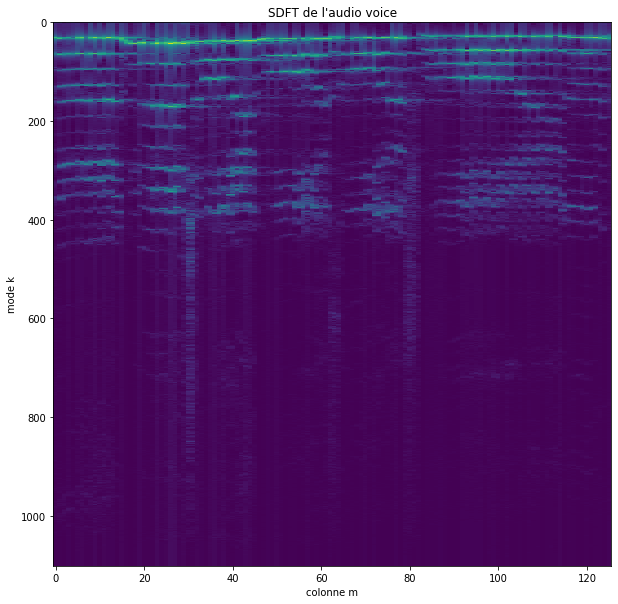

In [18]:
def sdft(u, N, mu):
    #calcul du nombre de colonnes
    M = 1 + (len(u) - N) // mu
    #initialisation de la matrice
    U = np.zeros((N, M), complex)
    for m in range(M):
        #calcul de la DFT de la fenêtre considérée
        U[:, m] = np.fft.fft(u[m * mu: m * mu + N])
    return U

# Chargement des données
u, sr = librosa.core.load("voice.wav")

# Largeur de fenêtre correspondant à 0.1 sec de signal
N = sr // 10

# Espacement entre les fenêtres
mu = N // 2

# Calcul de la SDFT
s = sdft(u, N, mu)

# Affichage de la SDFT, c'est-à-dire de son module, en fonction du mode d'oscillation k et de la colonne m
plt.figure(figsize = (10, 10))
plt.imshow(np.log(1 + np.abs(s[:N // 2, :])), aspect = "auto")
plt.title("SDFT de l'audio voice")
plt.xlabel("colonne m")
plt.ylabel("mode k")
plt.show()

Dans ce code, on charge d'abord nos données ($u,sr$) puis on définit la largeur des fenêtres $N$ puis l'espacement que l'on va prendre entre chaque fenêtre $\mu$. La fonction sdft retourne alors une matrice $(N,M)$ où chaque colonne $m$ correspond à la DFT de $u[m*\mu,m*\mu+N]$. On peut ensuite afficher le module de cette SDFT, avec ici en abscisse les colonnes $m$, et en ordonnée le mode d'oscillation dans la base de Fourier $k$.

Maintenant qu'on sait calculer la SDFT d'un signal, on peut en déduire pour chaque colonne de la matrice obtenue, la fréquence fondamentale du signal fenêtré, via la méthode dite "triviale" ainsi qu'avec celle de prise en compte du poids des harmoniques. Il ne nous reste qu'à adapter notre code de la partie $I$ pour une SDFT. On définit alors les nouvelles fonctions suivantes :

In [19]:
#U est notre SDFT, m l'indice de la colonne de U considérée

#Méthode simple
def k_0trivial(U,m):
    #calcul des fréquences et réordonnement par mode croissant
    frequencies = np.fft.fftfreq(len(U[:,m]), 1 / sr)
    freq= np.fft.fftshift(frequencies)
    #sélection de la colonne de la SDFT considérée
    sDFT= np.fft.fftshift(U[:,m])
    #conservation des fréquences positives du spectre
    freq=freq[len(freq)//2:]
    sDFT=sDFT[len(sDFT)//2:]
    #calcul de l'indice associé au maximum du module de la colonne m
    k=np.argmax(np.abs(sDFT))
    return freq[k]

#Méthode avec prise en compte du poids des harmoniques
def k_0poids(U,m):    
    frequencies = np.fft.fftfreq(len(U[:,m]), 1 / sr)
    freq= np.fft.fftshift(frequencies)
    sDFT= np.fft.fftshift(U[:,m])
    freq=freq[len(freq)//2:]
    sDFT=sDFT[len(sDFT)//2:]
    #définition des paramètres du calcul
    J=6
    summax=0
    kmax=0
    #appliquation de la formule précédemment explicitée
    for k in np.arange(0,1+len(freq)//(2*J),1):
        sumy=0
        for j in range(2*J-1):
            sumy=sumy+np.abs(sDFT)[int(k*(1+j/2))]*(-1)**j
        if sumy>summax:
            summax=sumy
            kmax=k
    return freq[kmax],kmax

## II.2 Amélioration de la résolution fréquentielle par interpolation de phase

On vient donc d'exposer un code qui nous permet d'approximer, pour chaque colonne $m$ de la SDFT, la fréquence fondamentale du signal considéré. Dans le but d'améliorer la précision de cette approximation, nous allons utiliser la méthode d'interpolation de phases. Pour cela on considère encore une SDFT, avec $N'>N$, et on se place dans l'exemple d'un signal sinusoïdal complexe de mode $f'$. Ainsi sur chaque fenêtre de longueur $N$, le mode du signal est $f=f'\frac{N}{N'}$. En prenant $k_0$ le mode entier le plus proche de l'harmonique mesurée précédemment et $\epsilon \in [-1/2,1/2]$ le facteur correctionnel "non-entier" tels que $f=k_0+\epsilon$, on a $f'=\frac{(k_0+\epsilon)N'}{N}$. Dans le but d'évaluer la valeur de $\epsilon$ et donc de mesurer une fréquence fondamentale plus précise, on va comparer deux colonnes $m_1$ et $m_2$ de notre SDFT. Cette méthode est appelée interpolation de phases, car on compare directement les phases des nombres complexes de notre SDFT $U$ correspondant à notre fréquence entière $k_0$ et aux deux colonnes considérées.

Après quelques manipulations mathématiques on obtient : $\epsilon =\frac{N(arg(U_{k_0,m_2})-arg(U_{k_0,m_1}))}{2\pi(m_2-m_1)}-k_0 \quad [\frac{N}{m_2-m_1}]$.

On a donc ici une relation de congruence. On va pouvoir calculer le terme principal puis soustraire ou additionner un certain nombre de fois $\frac{N}{m_2-m_1}$ afin d'obtenir $\epsilon \in [-1/2,1/2]$. Voici le code nous permettant de calculer ce terme, en prenant $m_2=m_1+\mu$ et $m_1$ la position de la fenêtre courante.

In [20]:
#U est notre SDFT, m l'indice de la colonne de U considérée, et donc m=m_1 en lien avec notre énoncé
def epsilon(U,m):
    #calcul du terme de congruence, m_2-m_1=mu, dans notre cas C=2
    C=N/mu
    #chargement de l'indice dans U[:,m] de la position k_0 de la fréquence fondamentale
    result=k_0poids(U,m)
    if m>=len(U[1,:])-1:
        return None
    #calcul d'epsilon, la fonction cmath.phase permet de retourner la phase d'un nombre complexe
    #result[1] correspond bien ici à l'indice k_0
    epsilon=N*(cmath.phase(U[result[1],m+1])-cmath.phase(U[result[1],m]))/(2*np.pi*mu) -result[1]
    #on utilise maintenant la propriété de congruence précédemment explicitée
    if epsilon>0:
        while epsilon-C>=0:
            epsilon=epsilon-C
        if np.abs(epsilon)>epsilon-C:
            return epsilon-C
        else: 
            return epsilon
    else:
        while epsilon+C<=0:
            epsilon=epsilon+C
        if np.abs(epsilon)>epsilon+C:
            return epsilon+C
        else: 
            return epsilon

On est maintenant dans la mesure d'appliquer cette méthode par interpolation de phase afin de calculer $\epsilon$ et donc d'en déduire $f'$ qui correspond alors au mode de la fréquence fondamentale instantannée du signal sur la fenêtre de la SDFT considérée. Il est important de noter qu'il est parfois possible de trouver $|\epsilon |>1/2$, ceci simplement parce que l'on considère parfois une fenêtre de SDFT qui se situe entre un changement de note du signal audio, ou alors lorsque la note est jouée en vibrato, c'est-à-dire lorsque l'amplitude de la note (ou son module) oscille. On est donc maintenant dans la capacité de calculer le mode $f'$ :

In [21]:
#N' représente ici le nombre total d'échantillons du signal, soit sa longueur, on a N'=N_
N_=len(u)

#fonction nous permettant de calculer f' tout en évitant l'apparition d'erreurs en fin de liste
def modefprime(U,m,N,mu,N_):
    result=k_0poids(U,m)
    eps=epsilon(U,m)
    if eps==None:
        return None
    else:
        return (result[0]+epsilon(s,m))*N_/N

# III.Application des méthodes sur plusieurs fichiers audios

Pour le fichier "voice" on a donc :

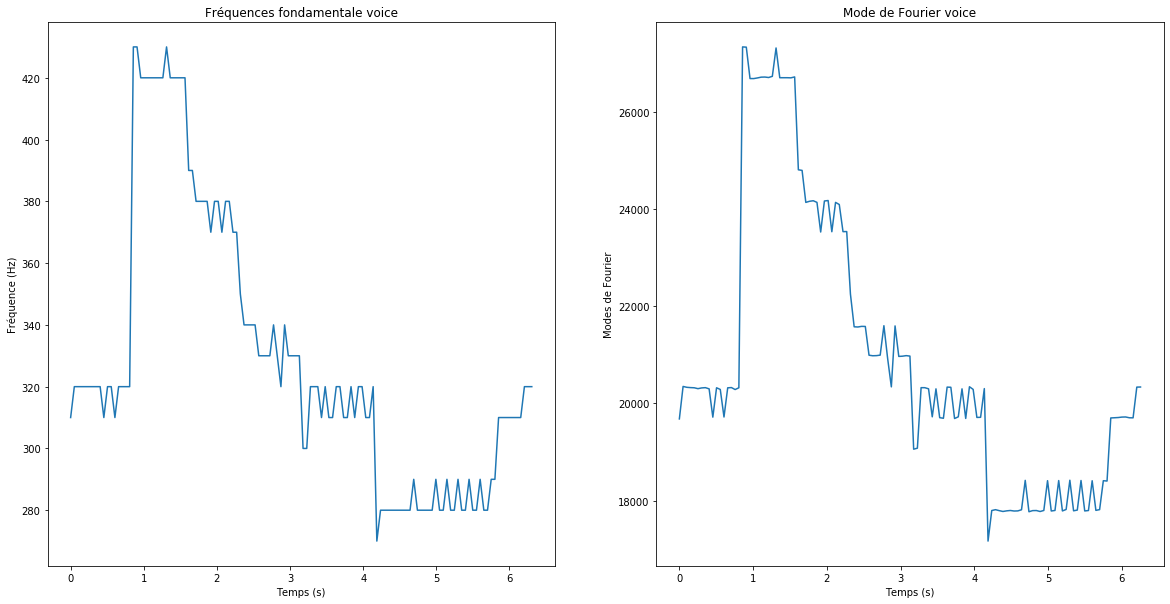

In [22]:
#Listes permettant de recueillir les valeurs de la fréquence fondamentale ainsi que du mode associé
K1=[]
mode1=[]
N_=len(u)
#itération sur toutes les colonnes de notre SDFT
for m in range(len(s[0,:])):
    result=k_0poids(s,m)
    K1.append(result[0])
    mode1.append(modefprime(s,m,N,mu,N_))
    #ces deux lignes de code permettent d'afficher colonne par colonne les résultats des différentes méthodes
    #print("m=",m,"  ","k triv=",k_0trivial(s,m),"  k=",result[0]," Hz","  ","eps=",epsilon(s,m))
    #print("f'=",modefprime(s,m,N,mu,N_))

#Durée du signal/nombre de colonnes
H=len(u)*(1/sr)/(1 + (len(u) - N) // mu) 
#on affiche d'une part les fréquences fondamentales du signal puis les modes associés
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(np.arange(0,len(u)/sr,H),K1)
plt.title("Fréquences fondamentale voice")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquence (Hz)")
plt.subplot(122)
plt.plot(np.arange(0,len(u)/sr,H),mode1)
plt.title("Mode de Fourier voice")
plt.xlabel("Temps (s)")
plt.ylabel("Modes de Fourier")
plt.show()

On réalise la même chose pour le fichier "violin2" :

In [23]:
W, sr = librosa.core.load("violin2.wav")
N = sr // 10
mu=N//2
P = sdft(W, N, mu)
K2=[]
mode2=[]
N_=len(W)
for m in range(len(P[0,:])):
    result=k_0poids(P,m)
    #print("m=",m,"  ","k triv=",k_0trivial(P,m),"  k=",result[0]," Hz","  ","eps=",epsilon(P,m))
    #print("f'=",modefprime(s,m,N,mu,N_))
    K2.append(result[0])
    mode2.append(modefprime(P,m,N,mu,N_))

Et enfin sur l'intégralité des signaux correspondant à "violin1" et "oboe":

In [24]:
Y, sr = librosa.core.load("violin1.wav")
N = sr // 10
mu=N//2
A = sdft(Y, N, mu)

K3=[]
mode3=[]
N_=len(Y)
for m in range(len(A[0,:])):
    result=k_0poids(A,m)
    K3.append(result[0])
    #mode3.append(modefprime(A,m,N,mu,N_))

In [25]:
Z, sr = librosa.core.load("oboe.wav")
N = sr // 10
mu=N//2
L = sdft(Z, N, mu)

K4=[]
mode4=[]
N_=len(Z)
for m in range(len(L[0,:])):
    result=k_0poids(L,m)
    K4.append(result[0])
    #mode4.append(modefprime(L,m,N,mu,N_))

Ecoute des fichiers audios :

In [28]:
print("Écoute du fichier voice.wav")
ipd.Audio(u, rate=sr)

Écoute du fichier voice.wav


In [29]:
print("Écoute du fichier violin2.wav")
ipd.Audio(W, rate=sr)

Écoute du fichier violin2.wav


In [30]:
print("Écoute du fichier violin1.wav")
ipd.Audio(Y, rate=sr)

Écoute du fichier violin1.wav


In [31]:
print("Écoute du fichier oboe.wav")
ipd.Audio(Z, rate=sr)

Écoute du fichier oboe.wav


On peut alors comparer les fréquences fondamentales et modes de tous ces audios :

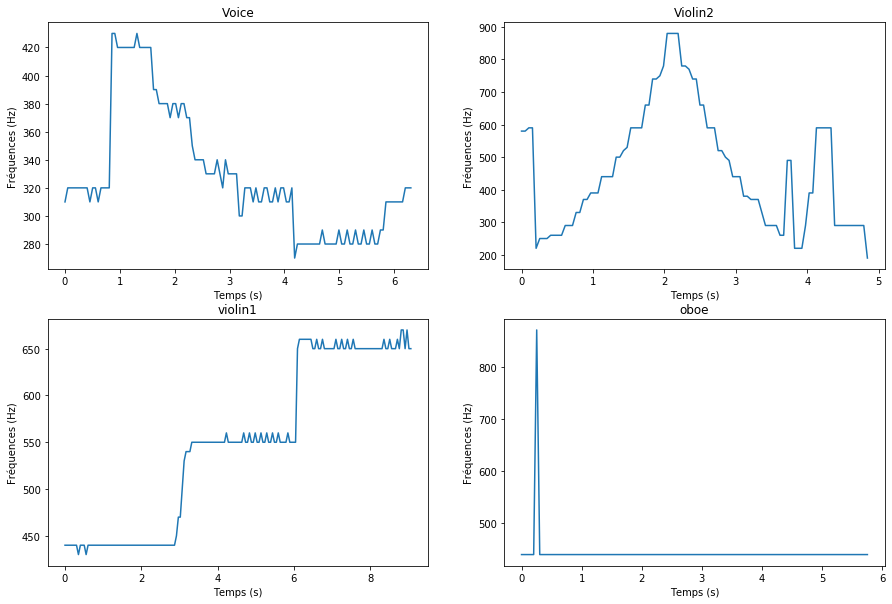

In [26]:
H1=len(u)*(1/sr)/(1 + (len(u) - N) // mu) 
H2=len(W)*(1/sr)/(1 + (len(W) - N) // mu)
H3=len(Y)*(1/sr)/(1 + (len(Y) - N) // mu)
H4=len(Z)*(1/sr)/(1 + (len(Z) - N) // mu)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(np.arange(0,len(u)/sr,H1),K1)
plt.title("Voice")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquences (Hz)")
plt.subplot(222)
plt.plot(np.arange(0,len(W)/sr,H2),K2)
plt.title("Violin2")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquences (Hz)")
plt.subplot(223)
plt.plot(np.arange(0,len(Y)/sr,H3),K3)
plt.title("violin1")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquences (Hz)")
plt.subplot(224)
plt.title("oboe")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquences (Hz)")
plt.plot(np.arange(0,len(Z)/sr,H4),K4)

On remarque donc que nos programmes marchent plutôt efficacement pour ces audios, tout ceci sans utiliser le fenêtrage non rectangulaire puisque l'on a trouvé que ça n'améliorait pas vraiment nos résultats. On note qu'il est néanmoins possible d'intégrer le fenêtrage non rectangulaire dans nos programmes de SDFT, il suffit alors simplement de multiplier notre signal par un $sin$ avant de réaliser la SDFT. Les variations des fréquences fondamentales sont facilement identifiables quand on écoute l'audio, il y a une bonne corrélation entre nos résultats et ceux-ci. On peut également maintenant faire de même pour les modes de Fourier :

Text(0, 0.5, "Mode f'")

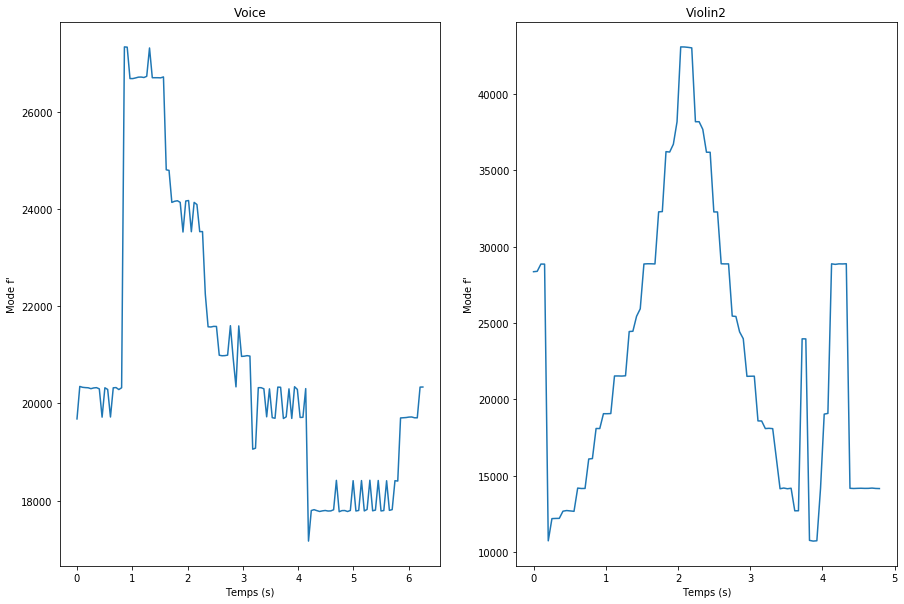

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(np.arange(0,len(u)/sr,H1),mode1)
plt.title("Voice")
plt.xlabel("Temps (s)")
plt.ylabel("Mode f'")
plt.subplot(122)
plt.plot(np.arange(0,len(W)/sr,H2),mode2)
plt.title("Violin2")
plt.xlabel("Temps (s)")
plt.ylabel("Mode f'")

## Conclusion

Tout d'abord, les différentes méthodes implémentées ici sont concluantes. En effet, on retrouve bien pour la détection de la fréquence fondamentale des valeurs proches des valeurs théoriques. Malgré quelques imprécisions quant à la localisation de la fréquence fondamentale probablement dûes à du bruit, à des imperfections des instruments, à une optimisitation possible de la fréquence d'échantillonnage du signal audio, on semble être dans la capacité de repérer convenablement les fréquences fondamentales associées aux différentes notes jouées.